In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
data = df.drop("koi_disposition", axis=1)

In [6]:
target = df["koi_disposition"]

In [7]:
feature_names = data.columns
data.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42) 

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.897025171624714

In [11]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.10858034988712874, 'koi_fpflag_co'),
 (0.09840162900127608, 'koi_fpflag_nt'),
 (0.06766428774312212, 'koi_fpflag_ss'),
 (0.052658681020374964, 'koi_model_snr'),
 (0.04526979971503965, 'koi_prad'),
 (0.03851694011678376, 'koi_duration_err1'),
 (0.035179541068716694, 'koi_prad_err2'),
 (0.03262618364910082, 'koi_duration_err2'),
 (0.032132509868441614, 'koi_steff_err1'),
 (0.02995224483997915, 'koi_fpflag_ec'),
 (0.027797702031688735, 'koi_prad_err1'),
 (0.027627575698494646, 'koi_steff_err2'),
 (0.02397279463690886, 'koi_time0bk_err1'),
 (0.023671464709343917, 'koi_time0bk_err2'),
 (0.02261916448454401, 'koi_duration'),
 (0.022343049883411514, 'koi_depth'),
 (0.021967313308163965, 'koi_period'),
 (0.019458068399170927, 'koi_impact'),
 (0.01846935716606682, 'koi_period_err1'),
 (0.01828000281992395, 'koi_period_err2'),
 (0.018257279653102438, 'koi_insol_err1'),
 (0.017021212485739234, 'koi_teq'),
 (0.016094764567602348, 'koi_insol'),
 (0.015206327650424688, 'koi_insol_err2'),
 (0.013

# Select your features (columns)

In [1]:
# Set features. This will also be used as your x values.

X = df[['koi_fpflag_co', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_ec','koi_duration_err2','koi_prad_err1',
        'koi_depth', 'koi_steff_err1','koi_duration_err1',
        'koi_model_snr', 'koi_prad', 'koi_prad', 'koi_depth', 'koi_duration', 'koi_impact'  ,
        'koi_teq','koi_insol', 'koi_time0bk','koi_period']]

y=df["koi_disposition"]


NameError: name 'df' is not defined

# Create a Train Test Split

Use `koi_disposition` for the y values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True) 

In [15]:
X_train.head()

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_model_snr,koi_prad,koi_depth,koi_duration,koi_impact,koi_teq,koi_insol,koi_time0bk,koi_period
6122,0,0,0,10.8,1.24,123.1,3.61600,0.150,1017,253.30,133.077240,6.768901
6370,0,0,1,13.8,0.86,114.6,2.30900,0.291,1867,2891.64,132.020050,0.733726
2879,0,1,0,254.3,3.21,641.1,79.89690,0.970,989,226.81,134.460380,7.652707
107,0,0,0,38.4,2.25,875.4,2.63120,0.300,696,55.37,174.662240,7.953547
29,0,0,0,696.5,12.21,9802.0,2.22739,0.831,1103,349.40,172.258529,4.959319


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [16]:
# Scale your data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


k: 1, Train/Test Score: 1.000/0.780
k: 3, Train/Test Score: 0.890/0.799
k: 5, Train/Test Score: 0.863/0.801
k: 7, Train/Test Score: 0.855/0.807
k: 9, Train/Test Score: 0.847/0.811
k: 11, Train/Test Score: 0.843/0.811
k: 13, Train/Test Score: 0.839/0.815
k: 15, Train/Test Score: 0.838/0.815
k: 17, Train/Test Score: 0.832/0.808
k: 19, Train/Test Score: 0.830/0.808
k: 21, Train/Test Score: 0.826/0.807
k: 23, Train/Test Score: 0.825/0.811
k: 25, Train/Test Score: 0.824/0.809
k: 27, Train/Test Score: 0.825/0.811
k: 29, Train/Test Score: 0.825/0.804
k: 31, Train/Test Score: 0.820/0.803
k: 33, Train/Test Score: 0.820/0.803
k: 35, Train/Test Score: 0.817/0.807
k: 37, Train/Test Score: 0.816/0.805
k: 39, Train/Test Score: 0.817/0.807
k: 41, Train/Test Score: 0.816/0.807
k: 43, Train/Test Score: 0.816/0.804
k: 45, Train/Test Score: 0.815/0.812
k: 47, Train/Test Score: 0.815/0.805
k: 49, Train/Test Score: 0.813/0.803


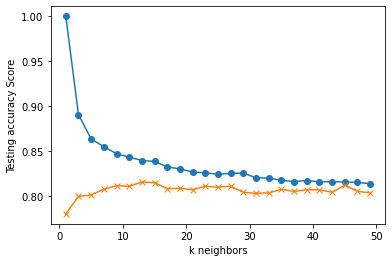

In [20]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()
    

# Train the Model



In [21]:
model1 = KNeighborsClassifier(n_neighbors=35)
model1.fit(X_train_scaled, y_train)
print(f"Training Data Score: {model1.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model1.score(X_test_scaled, y_test)}")

KNeighborsClassifier(n_neighbors=35)

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [23]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier()
param_grid = {'n_neighbors': [9, 35, 23],
              'weights': ['uniform', 'distance']}
grid = GridSearchCV(model, param_grid, verbose=3)

In [24]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ...... n_neighbors=9, weights=uniform, score=0.803, total=   0.1s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ...... n_neighbors=9, weights=uniform, score=0.792, total=   0.1s
[CV] n_neighbors=9, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...... n_neighbors=9, weights=uniform, score=0.796, total=   0.1s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ...... n_neighbors=9, weights=uniform, score=0.781, total=   0.1s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ...... n_neighbors=9, weights=uniform, score=0.807, total=   0.1s
[CV] n_neighbors=9, weights=distance .................................
[CV] ..... n_neighbors=9, weights=distance, score=0.806, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] ..... n_neighbors=9, weights=distance, score=0.786, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] ..... n_neighbors=9, weights=distance, score=0.798, total=   0.0s
[CV] n_neighbors=9, weights=distance .................................
[CV] ..... n_neighbors=9, weights=distance, score=0.788, total=   0.1s
[CV] n_neighbors=9, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.4s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [9, 35, 23],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [25]:
predictions=model1.predict(X_test_scaled)
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 23, 'weights': 'distance'}
0.7983968737947447


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.60      0.66      0.63       411
     CONFIRMED       0.70      0.65      0.67       484
FALSE POSITIVE       0.98      0.97      0.97       853

      accuracy                           0.81      1748
     macro avg       0.76      0.76      0.76      1748
  weighted avg       0.81      0.81      0.81      1748

[[270 131  10]
 [158 315  11]
 [ 21   6 826]]
0.8072082379862701


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash

import joblib
filename = 'KNNtim.sav'
your_model=KNeighborsClassifier(n_neighbors=17, weights="distance")
joblib.dump(your_model, filename)